># <center> <font color='red'> CMPE428 - DATA SCIENCE </font> </center>
>## <center> <font color='blue'> Assignment 6 - Nearest Neighbor Classification </font>  </center>

Mohamed amin osman yousif **23701297**

In [3]:
%pip install pandas scikit-learn seaborn
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from seaborn import load_dataset

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 4.0 MB/s eta 0:00:0000:0100:010m
  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
  Using cached scipy-1.10.1-cp38-cp38-macosx_12_0_arm64.whl (28.8 MB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
  Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
  Using cached matplotlib-3.7.5-cp38-cp38-macosx_11_0_arm64.whl (7.3 MB)
  Using cached pillow-10.4.0-cp38-cp38-macosx_11_0_arm64.whl (3.4 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.3/64.3 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 1.8 MB/s eta 0:00:0000:0100:010m
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
  Using cached contourpy-1.1.1-cp38-cp38-macosx_11_0_arm64.whl (232 kB)

[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the ke

Read the penguins dataset into the dataframe df using load_dataset('penguins'). Display the top 5 rows.
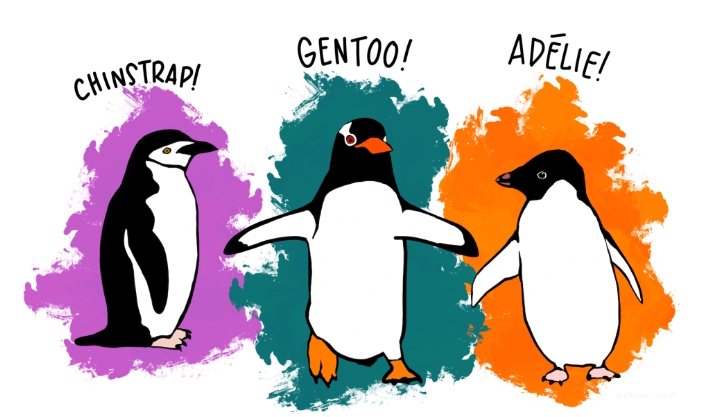

In [ ]:
df = load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


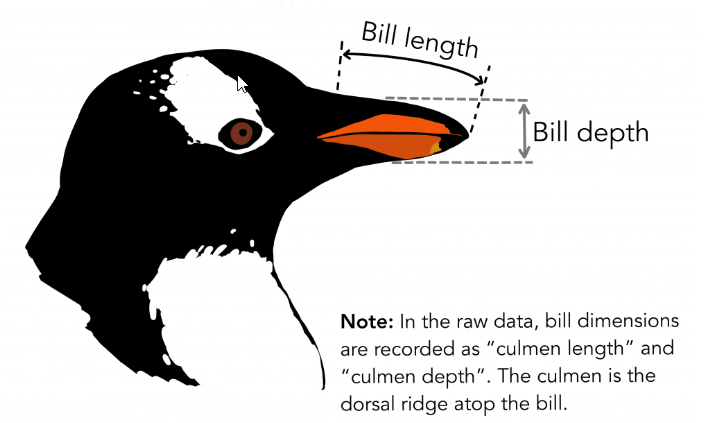

Display the number of rows in the dataset

In [20]:
df.shape[0]


333

Drop the rows having missing values.

In [7]:
df = df.dropna()

df.shape[0]

333

Use the columns 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm' and 'body_mass_g' to define the data (use variable X) and the column 'species' to define the labels (use variable y)

In [8]:
X = df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
y = df['species']

Using the describe method, check the range of values in each column of X and comment.

In [11]:
X.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


Using the label column, split your dataset into two parts, namely training data and test data, such that each part includes approximately the same number of samples from each class. Set random_state = 428

In [12]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=428)

Using the training data, generate a kNN classifier to predict the labels of the samples in the test data.

In [13]:
clf = KNeighborsClassifier(3)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

Compute the Accuracy of your classifier using the test data

In [14]:
print('Accuracy = ', clf.score(x_test, y_test))

Accuracy =  0.835820895522388


Scale the columns in the training and test datasets using zero mean and unit variance normalization. Note that StandardScaler returns Numpy ndarrays.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test  = scaler.transform(x_test)


Accuracy after scaling =  0.9850746268656716


Display the column means of x_train and x_test. Notice the diferences in the means and comment.

In [17]:
import numpy as np
x_train_means = np.mean(x_train, axis=0)
print(x_train_means)
x_test_means = np.mean(x_test, axis=0)
print(x_test_means)


[ 4.84157409e-16  1.43160337e-15 -2.83816412e-16  1.30221648e-16]
[ 0.12686388 -0.21141441  0.27791768  0.34610036]


Using the scaled training data, generate a kNN classifier to predict the labels of the samples in the scaled test data.

In [ ]:
clf2 = KNeighborsClassifier(3)
clf2.fit(x_train,y_train)
y_pred = clf2.predict(x_test)

Compute the Accuracy of your classifier using the scaled test data and compare with the accuracy you obtained before scaling,

In [19]:
print('Accuracy after scaling = ', clf2.score(x_test, y_test))

Accuracy after scaling =  0.9850746268656716
